In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

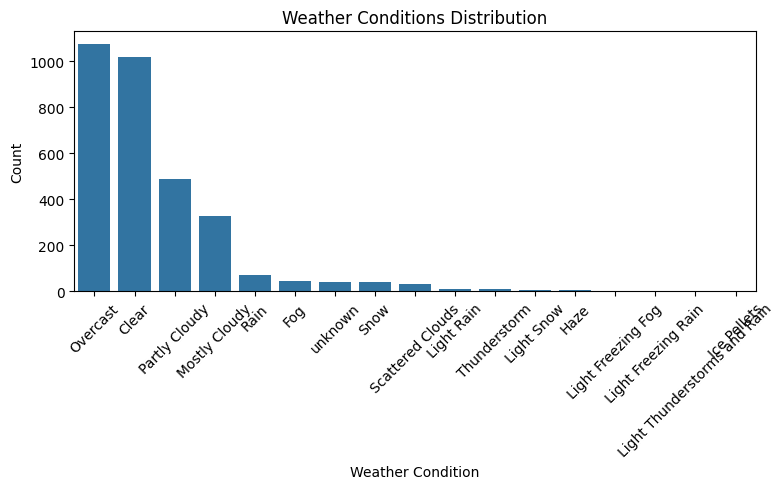

In [13]:
file_path = '../data/modified_data/Cleaned Unsent Dataset.csv'  
data = pd.read_csv(file_path)

data['dec.temperature'] = pd.to_numeric(data['dec.temperature'], errors='coerce')

weather_counts = data['dec.weather.condition'].value_counts()

temperature_distribution = data['dec.temperature'].dropna()
temperature_filtered = temperature_distribution[temperature_distribution > -50]


steps_distribution = data['jbsteps60'].dropna()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Weather Conditions Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

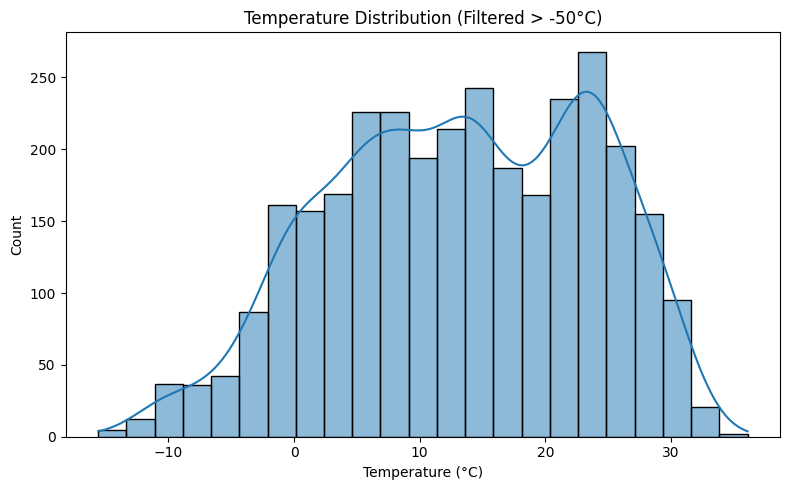

In [14]:
# Temperature distribution plot after filtering
plt.figure(figsize=(8, 5))
sns.histplot(temperature_filtered, kde=True)
plt.title('Temperature Distribution (Filtered > -50°C)')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

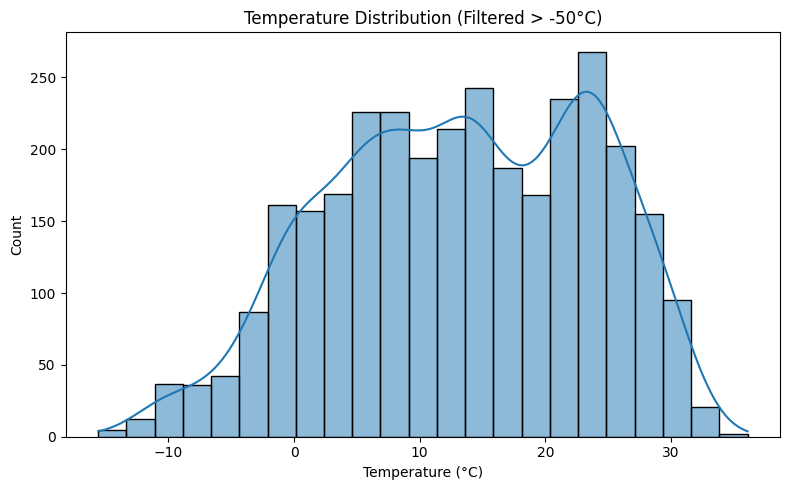

In [15]:
# Temperature distribution plot after filtering
plt.figure(figsize=(8, 5))
sns.histplot(temperature_filtered, kde=True)
plt.title('Temperature Distribution (Filtered > -50°C)')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

In [16]:
ranked_steps = data[['user.index', 'jbsteps60', 'jbmins60', 'sugg.decision.utime', 'dec.weather.condition', 'dec.temperature']].sort_values(by='jbsteps60', ascending=False)

ranked_steps.head(20)

,user.index,jbsteps60,jbmins60,sugg.decision.utime,dec.weather.condition,dec.temperature
2580,30,10754.0,60.0,2015-12-23 19:32:13,Rain,14.5
2575,30,10389.0,59.0,2015-12-21 16:33:03,Overcast,4.7
2598,30,9266.0,59.0,2015-12-31 16:35:42,Overcast,9.7
2546,30,9058.0,56.0,2015-12-05 16:32:22,Fog,-1.8
2583,30,8461.0,59.0,2015-12-25 19:33:11,Overcast,17.1
2564,30,7780.0,54.0,2015-12-15 16:31:31,Overcast,6.4
2614,30,7283.0,57.0,2016-01-11 16:32:48,Overcast,-11.7
2497,28,6322.0,60.0,2015-11-28 16:30:50,Scattered Clouds,2.0
2473,28,6099.0,43.0,2015-11-18 23:01:31,Rain,15.3
2635,31,6041.0,45.0,2016-01-09 19:41:23,Overcast,8.4


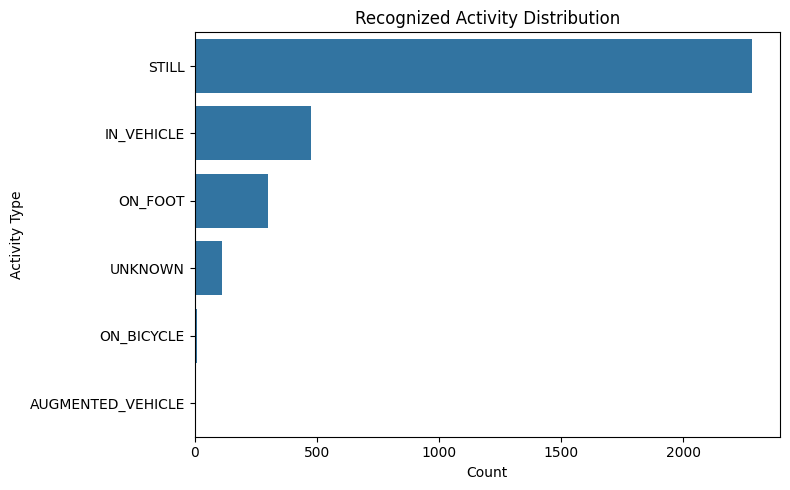

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(y=data['recognized.activity'])
plt.title('Recognized Activity Distribution')
plt.xlabel('Count')
plt.ylabel('Activity Type')
plt.tight_layout()
plt.show()

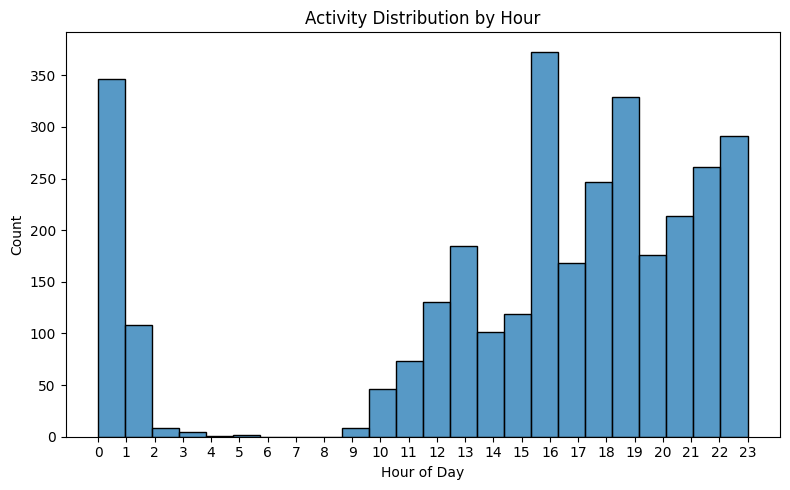

In [18]:
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S', errors='coerce')

data['hour'] = data['Time of Day'].dt.hour

plt.figure(figsize=(8, 5))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Activity Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()


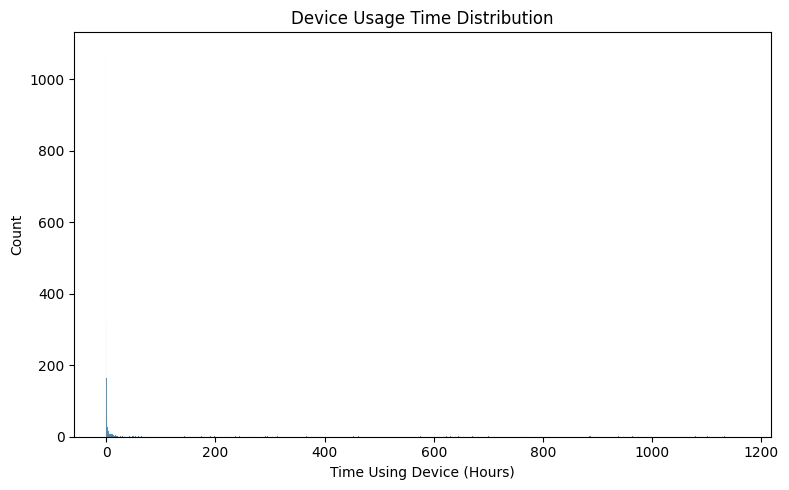

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data['sugg.device.since'].dropna(), kde=False)
plt.title('Device Usage Time Distribution')
plt.xlabel('Time Using Device (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

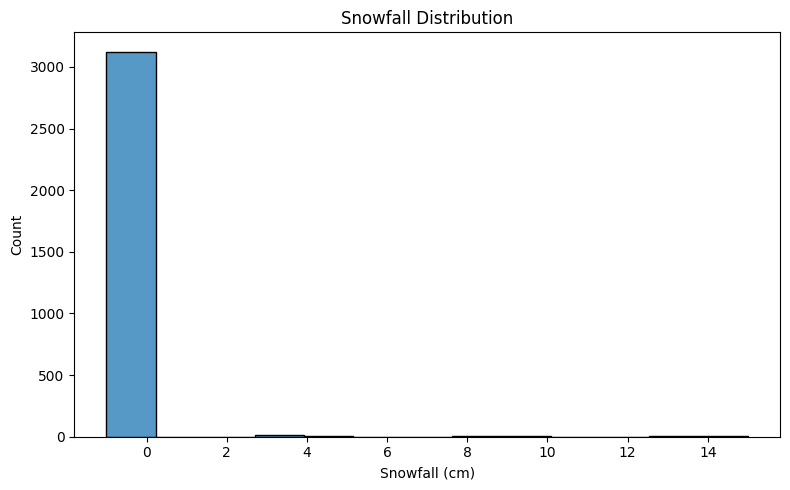

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(data['dec.snow'].dropna(), kde=False)
plt.title('Snowfall Distribution')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

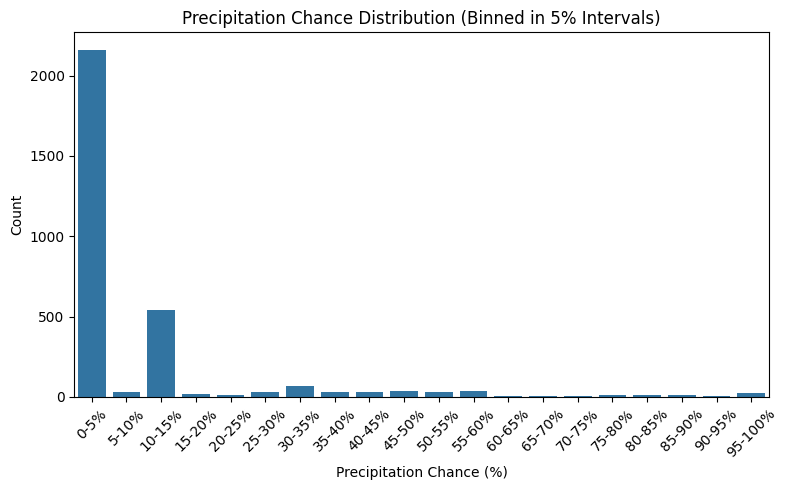

In [25]:
data['dec.precipitation.chance'] = pd.to_numeric(data['dec.precipitation.chance'], errors='coerce')

bins = range(0, 105, 5)  
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
data['precipitation_binned'] = pd.cut(data['dec.precipitation.chance'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='precipitation_binned', data=data)
plt.title('Precipitation Chance Distribution (Binned in 5% Intervals)')
plt.xlabel('Precipitation Chance (%)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

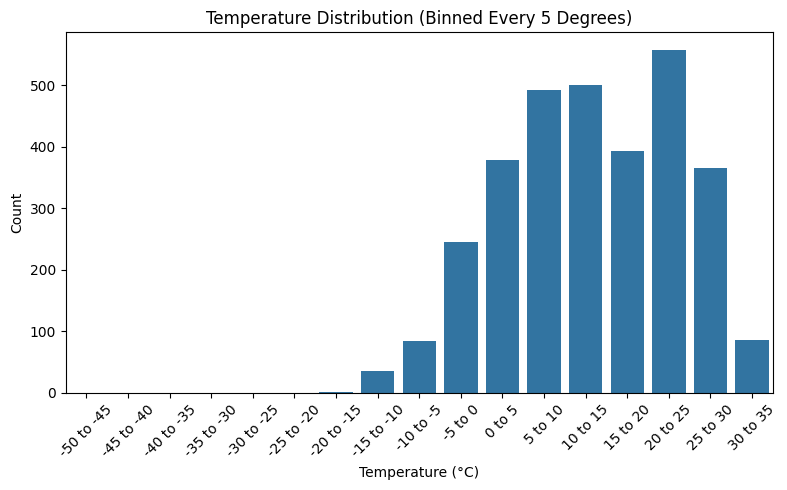

In [26]:
bins = range(-50, 40, 5)  
labels = [f'{i} to {i+5}' for i in range(-50, 35, 5)]

data['temperature_binned'] = pd.cut(data['dec.temperature'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='temperature_binned', data=data)
plt.title('Temperature Distribution (Binned Every 5 Degrees)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
